In [1]:
# Libraries
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
import numpy as np

report_duration = 550
max_reports_num = 5
min_reports_num = 5


In [3]:
# read input data
data_dir = '/home/mohammad/projects/nlp/mets_data/'

df = pd.read_excel(os.path.join(
    data_dir, 'mets_data_with_mets_encoding_remove_none.xlsx'))

#df.dropna(axis='rows', inplace=True)
# df.fillna(None, inplace=True)

df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,MOCK_MRN,Day of Scan,DISEASE_LABEL,abdominopelvic_nodes_metastases,adrenal_glands_metastases,bones_metastases,bowel_metastases,...,lung_metastases,mediastinum_thoracic_metastases,mesentery_and_peritoneum_metastases,pelvic_organs_metastases,pleura_metastases,soft_tissues_metastases,spleen_metastases,mets_binary_encoding,mets_decimal_encoding,mets_list
0,0,8,8,0004D6SIDW,0,Other_Male_Genital_Organs,Yes,No,No,No,...,No,No,No,No,No,No,No,1000000000000,4096,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,1,9,9,0004D6SIDW,8,Other_Male_Genital_Organs,No,No,No,No,...,No,No,No,No,No,No,No,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,2,11,11,0004J0PZBS,1718,Thyroid_Other_Endocrine,No,No,Yes,No,...,No,No,No,No,No,No,No,10000000000,1024,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,3,15,15,001H0PUBLJ,0,Corpus,No,No,No,No,...,No,No,No,No,No,No,No,10000000,128,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
4,4,17,17,002NOHORPH,0,UNKNOWN,Yes,No,No,No,...,No,No,No,No,No,No,No,1000000000000,4096,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [116]:
def myfunc(text):
    return [1 if x=="Yes" else 0 for x in text]
    # if text=='Yes':# ['0', 'None',"indeterminat",float('NaN'),float('nan')]:
    #     return 1
    # else:
    #     return 0 

In [123]:
a=["Yes","No",'None','non']
print(myfunc([a[0]]))

[1]


In [118]:
# df['features'] = df[mets_sites].astype(str)
#print(myfunc(data_new.iloc[20, 8]))
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,MOCK_MRN,Day of Scan,DISEASE_LABEL,abdominopelvic_nodes_metastases,adrenal_glands_metastases,bones_metastases,bowel_metastases,...,mediastinum_thoracic_metastases,mesentery_and_peritoneum_metastases,pelvic_organs_metastases,pleura_metastases,soft_tissues_metastases,spleen_metastases,mets_binary_encoding,mets_decimal_encoding,mets_list,features
0,0,8,8,0004D6SIDW,0,Other_Male_Genital_Organs,Yes,No,No,No,...,No,No,No,No,No,No,1000000000000,4096,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN
1,1,9,9,0004D6SIDW,8,Other_Male_Genital_Organs,No,No,No,No,...,No,No,No,No,No,No,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN
2,2,11,11,0004J0PZBS,1718,Thyroid_Other_Endocrine,No,No,Yes,No,...,No,No,No,No,No,No,10000000000,1024,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN
3,3,15,15,001H0PUBLJ,0,Corpus,No,No,No,No,...,No,No,No,No,No,No,10000000,128,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",NaN
4,4,17,17,002NOHORPH,0,UNKNOWN,Yes,No,No,No,...,No,No,No,No,No,No,1000000000000,4096,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN


In [170]:
def binatodeci(binary):
    return sum(val*(2**idx) for idx, val in enumerate(reversed(binary)))


In [171]:
# lambda row: ''.join(myfunc(row.values).astype(str)), axis=1

# df['features'] = df[mets_sites].apply(lambda row: ','.join(row.values.astype(str)), axis=1)  # , axis=0, raw=True, result_type=None)
# df['features'] = df['features'].apply(lambda row: myfunc(row.split(',')))

# myfunc(df.iloc[21,22].split(','))
df['features'] = df['features'].apply(lambda row: binatodeci(row))
df.iloc[20,:]


Unnamed: 0.2                                                                20
Unnamed: 0.1                                                                35
Unnamed: 0                                                                  35
MOCK_MRN                                                            0030TA3KZO
Day of Scan                                                               1188
DISEASE_LABEL                                                           Breast
abdominopelvic_nodes_metastases                                             No
adrenal_glands_metastases                                                   No
bones_metastases                                                           NaN
bowel_metastases                                                          None
kidneys_metastases                                                         NaN
liver_metastases                                                           NaN
lung_metastases                                     

In [90]:
mets_sites = list(df.columns[6:19])
df['features'] = df.apply(df[mets_sites].astype(str).sum(axis=1)


In [ ]:
df_cleaned2 = df_cleaned.loc[df_cleaned['Label'].isin(clist)]
# ["Breast", "ColoRectal", 'Prostate', 'Lung_Bronchus', 'NHL'])]
# df_with_5cancer['Label'].unique()
df_cleaned = df_cleaned2.reset_index(drop=True)

df_cleaned.head()


In [ ]:
input_data_label_number = np.unique(df.DISEASE_LABEL, return_counts=True)
class_number = len(input_data_label_number[0])

# print(np.unique(y_train, return_counts=True)[0].shape[0])
for i in range(0, class_number):
    print("label={} num={}".format(
        input_data_label_number[0][i], input_data_label_number[1][i]))


label=Anus num=756
label=Bones_Joints num=411
label=Brain_Nervous_System num=299
label=Breast num=14731
label=Cervix_Uteri num=1559
label=ColoRectal num=30688
label=Corpus num=9561
label=Esophagus num=3132
label=Eye_Orbit num=41
label=Head_Neck num=2264
label=Hodgkins_Lymphoma num=3632
label=Kaposi_Sarcoma num=29
label=Leukemia num=3018
label=Liver_Gallbladder_Bile_Duct num=7578
label=Lung_Bronchus num=19640
label=Melanoma num=8446
label=Miscellaneous num=174
label=Myeloma num=317
label=NHL num=11150
label=Other_Digestive_Organs num=1936
label=Other_Female_Genital_Organs num=497
label=Other_Male_Genital_Organs num=3297
label=Other_Non_Epithelial_Skin num=374
label=Other_Urinary num=15899
label=Ovary num=17079
label=Pancreas num=12013
label=Prostate num=12163
label=Soft_Tissue num=13461
label=Stomach num=4473
label=Thyroid_Other_Endocrine num=4013
label=UNKNOWN num=7227


In [ ]:
df = df.loc[df['DISEASE_LABEL'].isin(
    ["Breast", "ColoRectal", 'Prostate', 'Lung_Bronchus', 'NHL'])]
# df_with_5cancer['Label'].unique()
df = df.reset_index(drop=True)

df.head()


NameError: name 'df' is not defined

In [ ]:
df = df.loc[df['DISEASE_LABEL'].isin(
    ["Breast", "ColoRectal", 'Prostate', 'Lung_Bronchus', 'NHL'])]
# df_with_5cancer['Label'].unique()
df = df.reset_index(drop=True)

df.head()


NameError: name 'df' is not defined

In [ ]:
sub_df.head()

In [ ]:
df_cleaned2 = df_cleaned.loc[df_cleaned['Label'].isin(clist)]
    # ["Breast", "ColoRectal", 'Prostate', 'Lung_Bronchus', 'NHL'])]
# df_with_5cancer['Label'].unique()
df_cleaned = df_cleaned2.reset_index(drop=True)

df_cleaned.head()


In [ ]:
# Create a dataframe for clean data

# df_cleaned = pd.DataFrame(columns=["patient","one_year_mets_report","Label"])


In [ ]:
# mets_list = []
# for i,x in enumerate(df.loc[updated, 'Day of Scan']):
#     if x < 365:
#         # print(df.loc[updated, 'mets_decimal_encoding'][i])
#         mets_list.append(df.loc[updated, 'mets_decimal_encoding'][i])
# if len(mets_list)>=2:
#     while(len(mets_list) < 5):
#         mets_list.append(mets_list[-1])
#     df_cleaned['one_year_mets_report'] = ' '.join(str(e) for e in mets_list)
#     df_cleaned['Label'] = df.loc[updated, 'DISEASE_LABEL'][0]


    #print(x)


In [180]:
report_interval =  90
max_reports_num = 50
min_reports_num = 2
report_duration = (max_reports_num-1)*(report_interval)+(report_interval//2)
report_days = [x for x in range(0, report_duration, 90)]
print(report_days)


[0, 90, 180, 270, 360, 450, 540, 630, 720, 810, 900, 990, 1080, 1170, 1260, 1350, 1440, 1530, 1620, 1710, 1800, 1890, 1980, 2070, 2160, 2250, 2340, 2430, 2520, 2610, 2700, 2790, 2880, 2970, 3060, 3150, 3240, 3330, 3420, 3510, 3600, 3690, 3780, 3870, 3960, 4050, 4140, 4230, 4320, 4410]


In [179]:
report_days


NameError: name 'report_days' is not defined

In [ ]:
# mets_list = np.array([np.nan for i in range(len(report_days))])
# mets_list
# # mask = np.isnan(arr)
# # idx = np.where(~mask,np.arange(mask.shape[1]),0)
# # np.maximum.accumulate(idx,axis=1, out=idx)
# # out = arr[np.arange(idx.shape[0])[:,None], idx]
# np.isnan(mets_list)

In [176]:
df['features']

0         4096
1            0
2         1024
3          128
4         4096
          ... 
209853    4128
209854       0
209855    4096
209856     192
209857     200
Name: features, Length: 209858, dtype: int64

In [177]:
df.loc[updated, 'features'].values[i]


4096

In [183]:
# Create a dataframe for clean data 66 for 360 5 3, 68 for 370 5 3 f14X1
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_cleaned = pd.DataFrame(
    columns=["patient", "one_year_mets_report", "Label", 'First_year_reportCnt'])

patient_list = df.MOCK_MRN.unique()
j = 0
for item in patient_list:
    new_row = {}

    updated = df['MOCK_MRN'] == item
    #df_cleaned['patient'] = [item]
    new_row['patient'] = item

    #print(df.loc[updated, 'Day of Scan'])

    mets_list = [np.nan for i in range(len(report_days))]
    mets_list[0] = 0
    day_seq_list = []
    report_cnt = 0
    for i, report_date in enumerate(df.loc[updated, 'Day of Scan']):
        # if report_date < report_duration:
        
        mets_index = abs(report_date-np.array(report_days)).argmin()            
        mets_list[mets_index]=df.loc[updated, 'features'].values[i]
        
        if mets_index<=4:
            report_cnt = report_cnt +1
    # if len(mets_list) >= min_reports_num:
        # while(len(mets_list) < max_reports_num):
            # mets_list.append(mets_list[-1])
            # mets_list.insert(0, 0) #padding zeros from left
            # day_seq_list.insert(0, 0)
            # tmp = min(day_seq_list[-1] + 90, report_duration-1)
            # day_seq_list.append(tmp)
        #df_cleaned['one_year_mets_report'] = ' '.join(str(e) for e in mets_list)
        
    a = np.array([mets_list])
    mask = np.isnan(a)
    idx = np.where(~mask, np.arange(mask.shape[1]), 0)
    np.maximum.accumulate(idx, axis=1, out=idx)
    out1 = a[np.arange(idx.shape[0])[:, None], idx]
    out = list(out1[0])
    # print(out[0])

    new_row['one_year_mets_report'] = ' '.join(
        str(int(e)) for e in out)
    # new_row['day_seq'] = ' '.join(
            # str(e) for e in day_seq_list[0:max_reports_num])

        #df_cleaned['Label'] = df.loc[updated, 'DISEASE_LABEL'][0]
    
    new_row['Label'] = df.loc[updated, 'DISEASE_LABEL'].values[0]
    new_row['First_year_reportCnt'] = report_cnt
        # df_cleaned = new_row
    df_cleaned = df_cleaned.append(new_row, ignore_index=True)

    # pd.concat([df_cleaned, pd.DataFrame([new_row])], ignore_index=True)

    # j += 1
    # if  j == 15:
    #     break
df_cleaned.to_excel(os.path.join(
    data_dir, 'mets_data_{}_days_atleast_2_reports_seq{}_withDays.xlsx'.format(
        report_duration, max_reports_num)))


In [387]:
df_cleaned.head()


,Unnamed: 0,patient,one_year_mets_report,Label,First_year_reportCnt,report_number
0,0,0004D6SIDW,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,Other_Male_Genital_Organs,2,1
1,1,0004J0PZBS,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1024 102...,Thyroid_Other_Endocrine,0,1
2,2,001H0PUBLJ,128 128 128 128 128 128 128 128 128 128 128 12...,Corpus,1,1
3,3,002NOHORPH,4096 4096 4096 4128 4128 4128 4128 32 32 32 32...,UNKNOWN,2,3
4,4,002TEOQMKH,4096 4096 4096 4096 4096 4096 4096 4096 4096 4...,Leukemia,1,1


In [ ]:
# Create a dataframe for clean data 66 for 360 5 3, 68 for 370 5 3 f14X1

df_cleaned = pd.DataFrame(columns=["patient", "one_year_mets_report", "Label","day_seq"])

patient_list = df.MOCK_MRN.unique()
j = 0
for item in patient_list:
    new_row = {}

    updated = df['MOCK_MRN'] == item
    #df_cleaned['patient'] = [item]
    new_row['patient'] = item

    #print(df.loc[updated, 'Day of Scan'])

    mets_list = []
    day_seq_list = []
    for i, x in enumerate(df.loc[updated, 'Day of Scan']):
        if x < report_duration:
            day_seq_list.append(x)
            mets_list.append(
                df.loc[updated, 'features'].values[i])
            # mets_list.append(df.loc[updated, 'mets_decimal_encoding'].values[i])
    if len(mets_list) >= min_reports_num:
        while(len(mets_list) < max_reports_num):
            mets_list.append(mets_list[-1])
            # mets_list.insert(0, 0) #padding zeros from left
            # day_seq_list.insert(0, 0)
            tmp = min(day_seq_list[-1] + 90, report_duration-1)
            day_seq_list.append(tmp)
        #df_cleaned['one_year_mets_report'] = ' '.join(str(e) for e in mets_list)
        new_row['one_year_mets_report'] = ' '.join(
            str(e) for e in mets_list[0:max_reports_num])
        new_row['day_seq'] = ' '.join(
            str(e) for e in day_seq_list[0:max_reports_num])

        #df_cleaned['Label'] = df.loc[updated, 'DISEASE_LABEL'][0]
        new_row['Label'] = df.loc[updated, 'DISEASE_LABEL'].values[0]


        # df_cleaned = new_row
        df_cleaned = df_cleaned.append(new_row, ignore_index=True)
        
    j += 1
    if  j == 3500:
        break
df_cleaned.to_excel(os.path.join(
    data_dir, 'mets_data_{}_days_atleast_2_reports_seq{}_withDays.xlsx'.format(
        report_duration, max_reports_num)))

df_cleaned

In [167]:
len(mets_list)

1

In [186]:
import pandas as pd
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torch.autograd import Variable



data_dir = '/home/mohammad/projects/nlp/mets_data/'

df_cleaned = pd.read_excel(os.path.join(
    data_dir, 'mets_data_{}_days_atleast_2_reports_seq{}_withDays.xlsx'.format(
        report_duration, max_reports_num)))
df_cleaned.head()


,Unnamed: 0,patient,one_year_mets_report,Label,First_year_reportCnt
0,0,0004D6SIDW,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,Other_Male_Genital_Organs,2
1,1,0004J0PZBS,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1024 102...,Thyroid_Other_Endocrine,0
2,2,001H0PUBLJ,128 128 128 128 128 128 128 128 128 128 128 12...,Corpus,1
3,3,002NOHORPH,4096 4096 4096 4128 4128 4128 4128 32 32 32 32...,UNKNOWN,2
4,4,002TEOQMKH,4096 4096 4096 4096 4096 4096 4096 4096 4096 4...,Leukemia,1


In [665]:
time_frame_for_unique_mets = 12#:three years
input_seq_len = 13  # 
min_report_number = 0 # unique reports
min_No_training = 250

def calc_mets_len(x):
    return len(np.unique(np.array(x.split(" "))[:time_frame_for_unique_mets+1]))

df_cleaned['report_number'] = df_cleaned['one_year_mets_report'].apply(
    lambda x: calc_mets_len(x))
# df_cleaned.head()

# df_t = df_cleaned[df_cleaned.report_number >= min_report_number]
df_t = df_cleaned[df_cleaned.First_year_reportCnt >= min_report_number]

df_t = df_t[df_t.First_year_reportCnt >= min_report_number]
df_t = df_t[df_t.Label !="UNKNOWN"]

df_t.head()
# input_seq_len = 4  # 4: one year, 8:two_year, 12:three years


,Unnamed: 0,patient,one_year_mets_report,Label,First_year_reportCnt,report_number,Col2,Col1,Col3,Col0,Col4
0,0,0004D6SIDW,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,Other_Male_Genital_Organs,2,1,0,0,0,0,0
1,1,0004J0PZBS,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1024 102...,Thyroid_Other_Endocrine,0,1,0,0,0,0,0
2,2,001H0PUBLJ,128 128 128 128 128 128 128 128 128 128 128 12...,Corpus,1,1,128,128,128,128,128
4,4,002TEOQMKH,4096 4096 4096 4096 4096 4096 4096 4096 4096 4...,Leukemia,1,1,4096,4096,4096,4096,4096
5,5,0030TA3KZO,160 160 128 160 160 160 1188 1220 132 1220 121...,Breast,3,7,128,160,160,160,160


In [666]:
sub_df = df_t[df_t.groupby(
    'Label').Label.transform('count') >= min_No_training].copy()

# df_cleaned.loc[df_cleaned.loc(1)]
# df_with_5cancer = df_cleaned.loc[df_cleaned['Label'].isin(["Breast", "ColoRectal", 'Prostate', 'Lung_Bronchus', 'NHL'])]
# df_with_5cancer['Label'].unique()

input_data_label_number = np.unique(sub_df.Label, return_counts=True)
class_number = len(input_data_label_number[0])

# print(np.unique(y_train, return_counts=True)[0].shape[0])
for i in range(0, class_number):
    print("label={} num={}".format(
        input_data_label_number[0][i], input_data_label_number[1][i]))


label=Anus num=332
label=Breast num=4632
label=Cervix_Uteri num=620
label=ColoRectal num=8056
label=Corpus num=2801
label=Esophagus num=1266
label=Head_Neck num=847
label=Hodgkins_Lymphoma num=1266
label=Leukemia num=1484
label=Liver_Gallbladder_Bile_Duct num=2616
label=Lung_Bronchus num=6378
label=Melanoma num=2173
label=NHL num=3559
label=Other_Digestive_Organs num=667
label=Other_Male_Genital_Organs num=1697
label=Other_Urinary num=4158
label=Ovary num=3911
label=Pancreas num=4127
label=Prostate num=3957
label=Soft_Tissue num=3588
label=Stomach num=1455
label=Thyroid_Other_Endocrine num=1298


In [667]:
# df_with_5cancer = df_cleaned.loc[df_cleaned['Label'].isin(clist)]
# clist = ['Breast',"ColoRectal","Lung_Bronchus", "NHL","Ovary","Pancreas","Prostate"]
# sub_df = sub_df.loc[df_cleaned['Label'].isin(clist)]

# sub_df.head()



In [668]:
input_data_label_number = np.unique(sub_df.Label, return_counts=True)
class_number = len(input_data_label_number[0])

# print(np.unique(y_train, return_counts=True)[0].shape[0])
for i in range(0, class_number):
    print("label={} num={}".format(
        input_data_label_number[0][i], input_data_label_number[1][i]))


label=Anus num=332
label=Breast num=4632
label=Cervix_Uteri num=620
label=ColoRectal num=8056
label=Corpus num=2801
label=Esophagus num=1266
label=Head_Neck num=847
label=Hodgkins_Lymphoma num=1266
label=Leukemia num=1484
label=Liver_Gallbladder_Bile_Duct num=2616
label=Lung_Bronchus num=6378
label=Melanoma num=2173
label=NHL num=3559
label=Other_Digestive_Organs num=667
label=Other_Male_Genital_Organs num=1697
label=Other_Urinary num=4158
label=Ovary num=3911
label=Pancreas num=4127
label=Prostate num=3957
label=Soft_Tissue num=3588
label=Stomach num=1455
label=Thyroid_Other_Endocrine num=1298


In [669]:
# class_name = ['Other_Male_Genital_Organs', 'UNKNOWN', 'Breast', 'ColoRectal',
#                'Anus', 'Soft_Tissue', 'NHL', 'Ovary', 'Other_Digestive_Organs',
#                'Hodgkins_Lymphoma', 'Corpus', 'Head_Neck', 'Pancreas', 'Prostate',
#                'Leukemia', 'Melanoma', 'Esophagus', 'Cervix_Uteri',
#                'Other_Urinary', 'Lung_Bronchus', 'Liver_Gallbladder_Bile_Duct',
#                'Thyroid_Other_Endocrine', 'Stomach', 'Other_Non_Epithelial_Skin',
#                'Other_Female_Genital_Organs', 'Myeloma', 'Bones_Joints',
#                'Brain_Nervous_System', 'Miscellaneous', 'Eye_Orbit',
#                'Kaposi_Sarcoma']

# df_cleaned['Label'].replace(class_name,
#                             [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
#                              13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
#                              24, 25, 26, 27, 28, 29, 30
#                              ], inplace=True)

# num_mets_organ = 13

In [670]:
class_name = list(input_data_label_number[0])
label_num = [x for x in range(len(class_name))]
sub_df['Label'].replace(class_name, label_num, inplace=True)

num_mets_organ = 13
print(len(class_name))
print(len(label_num))
sub_df = sub_df.reset_index(drop=True)

sub_df.head()


22
22


,Unnamed: 0,patient,one_year_mets_report,Label,First_year_reportCnt,report_number,Col2,Col1,Col3,Col0,Col4
0,0,0004D6SIDW,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,14,2,1,0,0,0,0,0
1,1,0004J0PZBS,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1024 102...,21,0,1,0,0,0,0,0
2,2,001H0PUBLJ,128 128 128 128 128 128 128 128 128 128 128 12...,4,1,1,128,128,128,128,128
3,4,002TEOQMKH,4096 4096 4096 4096 4096 4096 4096 4096 4096 4...,8,1,1,4096,4096,4096,4096,4096
4,5,0030TA3KZO,160 160 128 160 160 160 1188 1220 132 1220 121...,1,3,7,128,160,160,160,160


In [671]:
from monai.utils import set_determinism

set_determinism(seed=0)
# torch.use_deterministic_algorithms(True)

val_frac = 0.2
test_frac = 0
length = len(sub_df.patient)
indices = np.arange(length)
np.random.shuffle(indices)

test_split = int(test_frac * length)
val_split = int(val_frac * length) + test_split
test_indices = indices[:test_split]
val_indices = indices[test_split:val_split]
train_indices = indices[val_split:]

train_x = [sub_df['one_year_mets_report'][i].split() for i in train_indices]
# train_wx = [sub_df['day_seq'][i].split()
        #    for i in train_indices]

train_y = [sub_df['Label'][i] for i in train_indices]
val_x = [sub_df['one_year_mets_report'][i].split() for i in val_indices]
# val_wx = [sub_df['day_seq'][i].split() for i in val_indices]

val_y = [sub_df['Label'][i] for i in val_indices]
test_x = [sub_df['one_year_mets_report'][i].split() for i in test_indices]
test_y = [sub_df['Label'][i] for i in test_indices]

print(
    f"Training count: {len(train_x)}, Validation count: "
    f"{len(val_x)}, Test count: {len(test_x)}")


# imbalance data sampler seting

classcount = np.bincount(train_y).tolist()
classcount_val = np.bincount(val_y).tolist()

train_weights = 1./torch.tensor(classcount, dtype=torch.float)
train__sampleweights = train_weights[train_y]
train_sampler = torch.utils.data.sampler.WeightedRandomSampler(
    weights=train__sampleweights, num_samples=len(train__sampleweights))
# trainloader = DataLoader(trainset, sampler=train_sampler, shuffle=False)
# classcount = np.bincount(val_y).tolist()
val_weights = 1./torch.tensor(classcount_val, dtype=torch.float)
val__sampleweights = val_weights[val_y]
val_sampler = torch.utils.data.sampler.WeightedRandomSampler(
    weights=val__sampleweights, num_samples=len(val__sampleweights), replacement=False)


Training count: 48711, Validation count: 12177, Test count: 0


In [672]:
class FirstYearMetsDataset(Dataset):
    """First Year Mets Dataset."""

    def __init__(self, input_data, label_data, input_weight, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.input_data = input_data
        self.label_data = label_data
        self.transform = transform
        self.input_weight = input_weight

    def convert(self, string):
        list1 = []
        list1[:0] = string

        return [float(x) for x in list1]

    def __len__(self):
        return len(self.label_data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # img_name = os.path.join(self.root_dir,
                                # self.landmarks_frame.iloc[idx, 0])
        image = self.input_data[idx]
        lable = self.label_data[idx]
        # weight = self.input_weight[idx]


        # landmarks = self.landmarks_frame.iloc[idx, 1:]
        # landmarks = np.array([landmarks])
        # landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'report': image, 'lable': lable}

        if self.transform:
            # sample = self.transform(sample)
            # sample['report'] = [self.convert('{0:013b}'.format(int(sample['report'][i])))+[float(1-(float(float(weight[i]))/(report_duration+10)))]
            # sample['report'] = [self.convert('{0:013b}'.format(int(sample['report'][i])))+[1-(float(float(weight[i])-90*i)/(float(weight[i])+1))]

                                # for i in range(len(sample['report']))]
            sample['report'] = [self.convert('{0:013b}'.format(int(sample['report'][i]))) for i in range(input_seq_len+1)]
            # x = np.array([float(sample['report'][i]) /
                #  4096 for i in range(input_seq_len+1)])
            # sample['report'] = x.reshape(
                # (x.shape[0], 1))


            # sample['report'] = [list(np.array(a[:13])*a[-1]) for a in sample['report']]

            sample['report'] = torch.from_numpy(np.asarray(sample['report'])).float()
            # float(1-(float(x)/(report_duration+10)))
            # torch.from_numpy(weight).float()
            # sample['report'] = torch.cat(sample['report'],torch.tensor(weight).float())
            sample['lable'] = np.eye(class_number, dtype='float32')[
                sample['lable']]

        return sample





train_ds = FirstYearMetsDataset(input_data=train_x, label_data=train_y, transform=True, input_weight=None)
val_ds = FirstYearMetsDataset(
    input_data=val_x, label_data=val_y, transform=True, input_weight=None)

print("reports for each:",input_seq_len+1)


reports for each: 14


In [673]:
# def convert(string):
#     list1 = []
#     list1[:0] = string
#     return [float(x) for x in list1]

# sample['report'] = [1,2,3,4,5]
# sample['report'] = [convert('{0:013b}'.format(int(item)))+[5.]
#                     for item in sample['report']]
# # sample['report'] = torch.from_numpy(np.asarray(sample['report'])).float()
# # [(item + [5])for item in sample['report']]
# # [x for x in sample['report']]
# [list(np.array(a)*5) for a in sample['report']]


In [674]:
for i in range(len(train_ds)):
    sample = train_ds[i]
    print((sample['report'])) # 6 13
    print((sample['lable']))

    break
# 

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [675]:
batch_size = 1024
train_loader = DataLoader(train_ds, sampler=train_sampler,
                          batch_size=batch_size,  num_workers=2)
val_loader = DataLoader(val_ds, sampler=val_sampler,
                        batch_size=batch_size,  num_workers=2)


In [676]:
# seq_length = 6

# # input_size = num_mets_organ  + 1
# input_size = 1
# hidden_size = 16

# class LSTM(nn.Module):

#     def __init__(self, num_classes, input_size, hidden_size, num_layers):
#         super(LSTM, self).__init__()
        
#         self.num_classes = num_classes
#         self.num_layers = num_layers
#         self.input_size = input_size
#         self.hidden_size = hidden_size
#         self.seq_length = seq_length
        
#         self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
#                             num_layers=num_layers, batch_first=True, bidirectional=False, dropout=0.3)
#         self.fc0 = nn.Linear(hidden_size, 1000)

#         self.fc = nn.Linear(hidden_size, num_classes)
#         self.softmax  = nn.Softmax(dim=1)

#     def forward(self, x):
#         h_0 = Variable(torch.zeros(
#             self.num_layers, x.size(0), self.hidden_size, device=device))
        
#         c_0 = Variable(torch.zeros(
#             self.num_layers, x.size(0), self.hidden_size, device=device))
        
#         # Propagate input through LSTM
#         ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
#         h_out = h_out.view(-1, self.hidden_size)
        
#         out = self.fc(h_out)
        
#         # out2 = self.fc(out1)
#         out = self.softmax(out)
        
#         return out

In [677]:
class LSTM_CANCER(nn.Module):
    def __init__(self, input_size, hidden_size, layer_size, output_size, bidirectional=True):
        super(LSTM_CANCER, self).__init__()
        
        self.input_size, self.hidden_size, self.layer_size, self.output_size = input_size, hidden_size, layer_size, output_size
        self.bidirectional = bidirectional
        
        # Step1: the LSTM model
        self.lstm = nn.LSTM(input_size, hidden_size, layer_size, batch_first=True, bidirectional=bidirectional)
        
        # Step2: the FNN
        if bidirectional: # we'll have 2 more layers
            self.layer = nn.Linear(hidden_size*2, output_size)
        else:
            self.layer = nn.Linear(hidden_size, output_size)
            
            
    def forward(self, images, prints=False
    ):
        if prints: print('images shape:', images.shape)
        
        # Set initial states
        if self.bidirectional:
            # Hidden state:
            hidden_state = torch.zeros(self.layer_size*2, images.size(0), self.hidden_size)
            # Cell state:
            cell_state = torch.zeros(self.layer_size*2, images.size(0), self.hidden_size)
        else:
            # Hidden state:
            hidden_state = torch.zeros(self.layer_size, images.size(0), self.hidden_size)
            # Cell state:
            cell_state = torch.zeros(self.layer_size, images.size(0), self.hidden_size)
        if prints: print('hidden_state t0 shape:', hidden_state.shape, '\n' +
                         'cell_state t0 shape:', cell_state.shape)
        
        # LSTM:
        output, (last_hidden_state, last_cell_state) = self.lstm(images, (hidden_state, cell_state))
        if prints: print('LSTM: output shape:', output.shape, '\n' +
                         'LSTM: last_hidden_state shape:', last_hidden_state.shape, '\n' +
                         'LSTM: last_cell_state shape:', last_cell_state.shape)
        # Reshape
        output = output[:, -1, :]
        if prints: print('output reshape:', output.shape)
        
        # FNN:
        output = self.layer(output)
        if prints: print('FNN: Final output shape:', output.shape)
        
        return output


In [678]:
num_layers = 2
hidden_size = 128#16#128#16#128#16 #26
input_size = num_mets_organ #+ 1
# input_size = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = LSTM(class_number, input_size, hidden_size, num_layers).to(device)


model = LSTM_CANCER(input_size, hidden_size,
                    num_layers, class_number).to(device)

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)#, weight_decay=1e-5)
# max_epochs = 1000
val_interval = 1


In [679]:
def pytorch_count_params(model):
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params


print(pytorch_count_params(model))


547350


In [680]:
model.forward

<bound method LSTM_CANCER.forward of LSTM_CANCER(
  (lstm): LSTM(13, 128, num_layers=2, batch_first=True, bidirectional=True)
  (layer): Linear(in_features=256, out_features=22, bias=True)
)>

In [681]:
# for batch_data in train_loader:
#     # step += 1
#     inputs, labels = batch_data['report'].to(device), batch_data['lable'].to(device)
#     optimizer.zero_grad()
#     outputs = model(inputs)
#     break


In [682]:
# class LSTM_MNIST(nn.Module):
#     def __init__(self, input_size, hidden_size, layer_size, output_size, bidirectional=True):
#         super(LSTM_MNIST, self).__init__()
        
#         self.input_size, self.hidden_size, self.layer_size, self.output_size = input_size, hidden_size, layer_size, output_size
        
#         self.bidirectional = bidirectional
        
#         # Step1: the LSTM model
#         self.lstm = nn.LSTM(input_size, hidden_size, layer_size, batch_first=True, bidirectional=bidirectional, dropout)
        
#         # Step2: the FNN
#         if bidirectional: # we'll have 2 more layers
#             self.layer = nn.Linear(hidden_size*2, output_size)
#         else:
#             self.layer = nn.Linear(hidden_size, output_size)
            
            
#     def forward(self, images, prints=False):
#         if prints: print('images shape:', images.shape)
        
#         # Set initial states
#         if self.bidirectional:
#             # Hidden state:
#             hidden_state = torch.zeros(self.layer_size*2, images.size(0), self.hidden_size)
#             # Cell state:
#             cell_state = torch.zeros(self.layer_size*2, images.size(0), self.hidden_size)
#         else:
#             # Hidden state:
#             hidden_state = torch.zeros(self.layer_size, images.size(0), self.hidden_size)
#             # Cell state:
#             cell_state = torch.zeros(self.layer_size, images.size(0), self.hidden_size)
#         if prints: print('hidden_state t0 shape:', hidden_state.shape, '\n' +
#                          'cell_state t0 shape:', cell_state.shape)
        
#         # LSTM:
#         output, (last_hidden_state, last_cell_state) = self.lstm(images, (hidden_state, cell_state))
#         if prints: print('LSTM: output shape:', output.shape, '\n' +
#                          'LSTM: last_hidden_state shape:', last_hidden_state.shape, '\n' +
#                          'LSTM: last_cell_state shape:', last_cell_state.shape)
#         # Reshape
#         output = output[:, -1, :]
#         if prints: print('output reshape:', output.shape)
        
#         # FNN:
#         output = self.layer(output)
#         if prints: print('FNN: Final output shape:', output.shape)
        
#         return output

In [683]:
model.forward

<bound method LSTM_CANCER.forward of LSTM_CANCER(
  (lstm): LSTM(13, 128, num_layers=2, batch_first=True, bidirectional=True)
  (layer): Linear(in_features=256, out_features=22, bias=True)
)>

In [684]:
# max_reports_train = 5
 

In [685]:
root_dir = '/home/mohammad/projects/nlp/best_model/'
best_metric = -1
best_acc = -1
best_top2_acc = -1
best_metric_epoch = -1
epoch_loss_values = []
metric_values = []
val_interval =1
acc_metric = 0

max_epochs = 1000
stop_epoch =50
# model.load_state_dict(torch.load(os.path.join(
    # root_dir, f'TimeInterval_{input_seq_len*90}_MinRadiologyReports_{min_report_number}_ClassNumber_{class_number}_timeSeries_{input_seq_len}.pth')))


model.eval()
for epoch in range(max_epochs):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{max_epochs}")
    model.train()
    epoch_loss = 0
    step = 0
    for batch_data in train_loader:
        step += 1
        inputs, labels = batch_data['report'].to(device), batch_data['lable'].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        # print(f"epoch {epoch + 1}"
        # if (epoch + 1) % 10 == 0:

        print(f"epoch {epoch} {acc_metric:.4f},best_epoch {best_metric_epoch} {best_acc}:{step}/{len(train_ds) // train_loader.batch_size}, "
            f"train_loss: {loss.item():.4f}")
        epoch_len = len(train_ds) // train_loader.batch_size
    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            y_pred = torch.tensor([], dtype=torch.float32, device=device)
            y = torch.tensor([], dtype=torch.long, device=device)
            for val_data in val_loader:
                val_images, val_labels = (
                    val_data['report'].to(device),
                    val_data['lable'].to(device),
                )
                y_pred = torch.cat([y_pred, model(val_images)], dim=0)
                y = torch.cat([y, val_labels.long()], dim=0)
           
            acc_value = torch.eq(y_pred.argmax(dim=1), y.argmax(dim=1))
            acc_metric = acc_value.sum().item() / len(acc_value)

            if acc_metric > best_acc:
                best_acc = acc_metric
                torch.save(model.state_dict(), os.path.join(
                    root_dir, f'TimeInterval_{input_seq_len*90}_MinRadiologyReports_{min_report_number}_ClassNumber_{class_number}_timeSeries_{input_seq_len}_hsize_{hidden_size}_train_{min_No_training}.pth'))

                print("saved new best metric model") 
                best_metric_epoch = epoch + 1
            
            print(
                # f"current epoch: {epoch + 1} current AUC: {result:.4f}"
                f" current accuracy: {acc_metric:.4f}"
                f" best ACC: {best_acc:.4f}\n"
                # f" best AUC: {best_metric:.4f}"
                f" at epoch: {best_metric_epoch}"
            )
            if abs(best_metric_epoch-epoch) > stop_epoch:
                break
           
print(
    f"train completed, best_metric: {best_acc:.4f} "
    f"at epoch: {best_metric_epoch}")


----------
epoch 1/1000
epoch 0 0.0000,best_epoch -1 -1:1/47, train_loss: 3.0921
epoch 0 0.0000,best_epoch -1 -1:2/47, train_loss: 3.0912
epoch 0 0.0000,best_epoch -1 -1:3/47, train_loss: 3.0913
epoch 0 0.0000,best_epoch -1 -1:4/47, train_loss: 3.0920
epoch 0 0.0000,best_epoch -1 -1:5/47, train_loss: 3.0880
epoch 0 0.0000,best_epoch -1 -1:6/47, train_loss: 3.0906
epoch 0 0.0000,best_epoch -1 -1:7/47, train_loss: 3.0897
epoch 0 0.0000,best_epoch -1 -1:8/47, train_loss: 3.0931
epoch 0 0.0000,best_epoch -1 -1:9/47, train_loss: 3.0906
epoch 0 0.0000,best_epoch -1 -1:10/47, train_loss: 3.0877
epoch 0 0.0000,best_epoch -1 -1:11/47, train_loss: 3.0887
epoch 0 0.0000,best_epoch -1 -1:12/47, train_loss: 3.0896
epoch 0 0.0000,best_epoch -1 -1:13/47, train_loss: 3.0891
epoch 0 0.0000,best_epoch -1 -1:14/47, train_loss: 3.0873
epoch 0 0.0000,best_epoch -1 -1:15/47, train_loss: 3.0880
epoch 0 0.0000,best_epoch -1 -1:16/47, train_loss: 3.0904
epoch 0 0.0000,best_epoch -1 -1:17/47, train_loss: 3.0873

In [686]:
for batch_data in train_loader:
    print(batch_data['report'][0])
    break


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [687]:
# calculate and print classification reports
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, multilabel_confusion_matrix


In [688]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import top_k_accuracy_score

model.load_state_dict(torch.load(os.path.join(
    root_dir, f'TimeInterval_{input_seq_len*90}_MinRadiologyReports_{min_report_number}_ClassNumber_{class_number}_timeSeries_{input_seq_len}_hsize_{hidden_size}_train_{min_No_training}.pth')))
model.eval()
with torch.no_grad():
    y_pred = torch.tensor([], dtype=torch.float32, device=device)
    y = torch.tensor([], dtype=torch.long, device=device)
    for val_data in val_loader:
        val_images, val_labels = (
            val_data['report'].to(device),
            val_data['lable'].to(device),
        )
        y_pred = torch.cat([y_pred, model(val_images)], dim=0)
        y = torch.cat([y, val_labels.long()], dim=0)



                             precision    recall  f1-score   support

                       Anus       0.01      0.18      0.02        65
                     Breast       0.33      0.19      0.24       913
               Cervix_Uteri       0.05      0.17      0.08       132
                 ColoRectal       0.40      0.17      0.24      1623
                     Corpus       0.20      0.10      0.13       577
                  Esophagus       0.08      0.07      0.07       240
                  Head_Neck       0.06      0.25      0.10       160
          Hodgkins_Lymphoma       0.17      0.50      0.25       253
                   Leukemia       0.28      0.39      0.32       310
Liver_Gallbladder_Bile_Duct       0.16      0.23      0.19       518
              Lung_Bronchus       0.44      0.37      0.40      1281
                   Melanoma       0.11      0.10      0.10       418
                        NHL       0.32      0.14      0.19       748
     Other_Digestive_Organs      

Text(0.5, 0.98, 'TimeInterval: 1170 days, Min No. of RadiologyReports: 0 Top1to5 Accuracy=[0.22, 0.37, 0.48, 0.54, 0.61] \n ClassNumber: 22 Cancer types Min No. of train data 250 each class \n Training count: 48711, Validation count:12177\n time_series_No: 13')

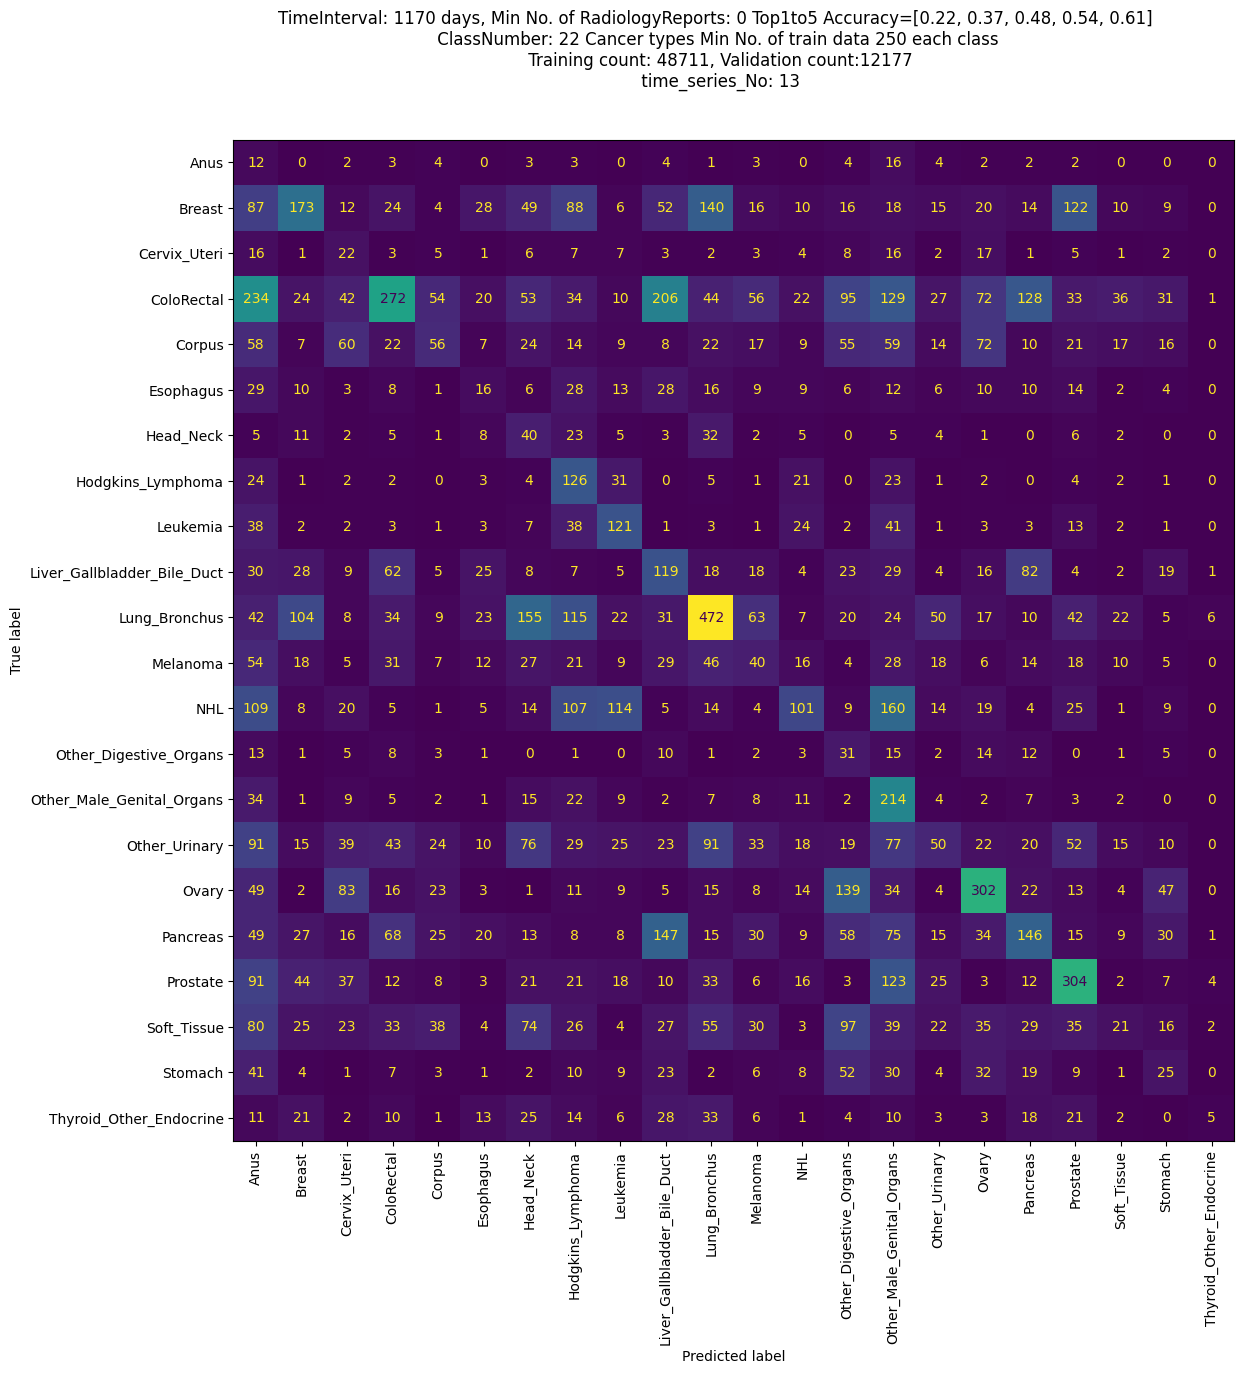

In [689]:

top5_acc = [round(top_k_accuracy_score(y.argmax(dim=1).cpu(), y_pred.cpu(), k=i), 2)
            for i in range(1, 6)]

y_test = y.argmax(dim=1).cpu()
y_score = y_pred.argmax(dim=1).cpu()
print(classification_report(y_test, y_score, target_names=class_name))

cm = confusion_matrix(y_test, y_score)
# fig, ax = plt.subplots(figsize=(15, 15))
# fig, ax = plt.subplots(figsize=(10, 10))

cm_display = ConfusionMatrixDisplay(
    cm, display_labels=class_name).plot(xticks_rotation='vertical', colorbar=False)

fig = cm_display.figure_
fig.set_figwidth(13)
fig.set_figheight(13)
fig.suptitle('TimeInterval: {} days, Min No. of RadiologyReports: {} Top1to5 Accuracy={} \n ClassNumber: {} Cancer types Min No. of train data {} each class \n Training count: {}, Validation count:{}\n time_series_No: {}'.format(
    input_seq_len*90, min_report_number, top5_acc, class_number, min_No_training, len(train_x), len(val_x), input_seq_len))
# cm_display.set_xticklabels(['']+class_names, rotation=270)
# cm_display.set_yticklabels(['']+class_names)


In [690]:
# root_dir = '/home/mohammad/projects/nlp/best_model/'
# best_metric = -1
# best_acc = -1
# best_metric_epoch = -1
# epoch_loss_values = []
# metric_values = []
# epoch = 0
# class_number = 20
# # model = LSTM_CANCER(input_size, hidden_size,
#                     # num_layers, class_number).to(device)
# best_model = 'best_metric_top2.pth'  # low_high grade

# model.load_state_dict(torch.load(os.path.join(root_dir,best_model )))#"best_metric_model_2class.pth")))
# model.eval()
# with torch.no_grad():
#     y_pred = torch.tensor([], dtype=torch.float32, device=device)
#     y = torch.tensor([], dtype=torch.long, device=device)
#     for val_data in val_loader:
#         val_images, val_labels = (
#             val_data['report'].to(device),
#             val_data['lable'].to(device),
#         )
#         y_pred = torch.cat([y_pred, model(val_images)], dim=0)
#         y = torch.cat([y, val_labels.long()], dim=0)
#         # y_oneh


#     acc_value = torch.eq(y_pred.argmax(dim=1), y.argmax(dim=1))
#     acc_metric = acc_value.sum().item() / len(acc_value)
                    
#     print(f" best ACC: {acc_metric:.4f}\n")


In [691]:
# cm = confusion_matrix(y_true, y_preds, normalize='all')
# cmd = ConfusionMatrixDisplay(cm, display_labels=['business', 'health'])
# cmd.plot()
# cmd.ax_.set(xlabel='Predicted', ylabel='True')


In [692]:
# acc_value = torch.eq(y_pred.argmax(dim=1), y.argmax(dim=1))


# cm = confusion_matrix(y.argmax(dim=1).cpu(), y_pred.argmax(dim=1).cpu())


In [693]:
# one_year =[0.3256021409455843, 0.5236396074933095, 0.6320249776984835,
#     0.727921498661909, 0.8019625334522748]

# three_years = [0.2866059817945384, 0.4697009102730819,
#                0.5898569570871262, 0.6764629388816645, 0.7482444733420026]


In [694]:
# print([top_k_accuracy_score(y.argmax(dim=1).cpu(), y_pred.cpu(), k=i) for i in range(1,6)])

In [695]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay
# from matplotlib import pyplot as plt
# from sklearn.metrics import top_k_accuracy_score
# # print(top_k_accuracy_score(y.cpu(), y_pred.cpu(), k=2))

# cm = confusion_matrix(y.argmax(dim=1).cpu(), y_pred.argmax(dim=1).cpu(), normalize='pred')
# # cm_display = ConfusionMatrixDisplay(cm).plot(colorbar=False)

# # cm = confusion_matrix(y_true, y_preds, normalize='all')
# # cmd = ConfusionMatrixDisplay(cm, display_labels=class_name)
# # cmd.plot()
# # cmd.ax_.set(xlabel='Predicted', ylabel='True')

# # ax.set_xticklabels(['']+class_names, rotation=270)
# # ax.set_yticklabels(['']+class_names)

# # cm = confusion_matrix(y_test, y_pred)
# # Normalise
# cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# fig, ax = plt.subplots(figsize=(15, 15))
# sns.heatmap(cmn, annot=True, fmt='.2f',
#             xticklabels=class_name, yticklabels=class_name)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show(block=False)


In [696]:
# # calculate and print classification reports
# from sklearn.metrics import roc_curve
# from sklearn.metrics import RocCurveDisplay
# from sklearn.metrics import classification_report, multilabel_confusion_matrix

# y_test = y.argmax(dim=1).cpu()
# y_score = y_pred.argmax(dim=1).cpu()
# print(classification_report(y_test, y_score, target_names=class_name))


In [697]:
#  precision    recall  f1-score   support

#                      Breast       0.38      0.34      0.36       202
#                  ColoRectal       0.50      0.32      0.39       385
#                      Corpus       0.22      0.25      0.23       125
# Liver_Gallbladder_Bile_Duct       0.19      0.26      0.22       112
#               Lung_Bronchus       0.45      0.42      0.43       298
#                    Melanoma       0.13      0.18      0.15       126
#                         NHL       0.27      0.56      0.37        96
#               Other_Urinary       0.24      0.14      0.18       216
#                       Ovary       0.49      0.60      0.54       224
#                    Pancreas       0.24      0.17      0.20       214
#                    Prostate       0.29      0.44      0.35        95
#                 Soft_Tissue       0.19      0.23      0.21       149

#                    accuracy                           0.33      2242
#                   macro avg       0.30      0.33      0.30      2242
#                weighted avg       0.34      0.33      0.32      2242


In [947]:
df_cleaned.head()
df_cleaned['Col4'] = df_cleaned['one_year_mets_report'].str.split(' ').str[4]
df_cleaned.head()
df_t = df_cleaned[df_cleaned.First_year_reportCnt >= 4]
df_t = df_t[df_t.Label != "UNKNOWN"]
col = ['Col0', 'Col1', 'Col2', 'Col3', 'Label']
df_tsv = df_t[col]
df_tsv = df_tsv.reset_index(drop=True)


In [948]:
df_tsv.head()
df_tsv_c = df_tsv[df_tsv.groupby(
    'Label').Label.transform('count') >= min_No_training].copy()


In [949]:
input_data_label_number = np.unique(
    df_tsv_c.Label, return_counts=True)
class_number = len(input_data_label_number[0])

# print(np.unique(y_train, return_counts=True)[0].shape[0])
for i in range(0, class_number):
    print("label={} num={}".format(
        input_data_label_number[0][i], input_data_label_number[1][i]))


label=Breast num=612
label=ColoRectal num=1289
label=Corpus num=401
label=Liver_Gallbladder_Bile_Duct num=382
label=Lung_Bronchus num=1232
label=Melanoma num=422
label=Other_Urinary num=784
label=Ovary num=666
label=Pancreas num=597
label=Prostate num=254
label=Soft_Tissue num=525


In [951]:
df_tsv_c = df_tsv_c.reset_index(drop=True)
tlenght= 4

In [952]:
df_tsv_c.shape
In_data = np.arange(df_tsv_c.shape[0]*tlenght*13, dtype='float32')
In_data.resize((df_tsv_c.shape[0], tlenght, 13))
Out_data = np.arange(df_tsv_c.shape[0])
# Out_data.resize((df_tsv.shape[0], 5, 13))
In_data.shape

(7164, 4, 13)

In [953]:
for j in range(len(df_tsv_c)):

    In_data[j] = [convert('{0:013b}'.format(int(df_tsv_c.iloc[j].values[i])))
    for i in range(tlenght)]


In [954]:
labels = np.array(df_tsv_c['Label'].values)
l, b = np.unique(labels, return_inverse=True)

In [1066]:
l

array(['Breast', 'ColoRectal', 'Corpus', 'Liver_Gallbladder_Bile_Duct',
       'Lung_Bronchus', 'Melanoma', 'Other_Urinary', 'Ovary', 'Pancreas',
       'Prostate', 'Soft_Tissue'], dtype=object)

In [955]:
bs = b.astype('str')
bs.shape
# np.memmap(bs, dtype=bs.dtype, mode='w+', shape=bs.shape)


(7164,)

In [956]:
In_data[0]

array([[0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.]],
      dtype=float32)

In [ ]:
# list_label = []
# for j in range(len(df_tsv)):

#     list_label.append(df_tsv['Label'])


In [957]:
In_data.shape


(7164, 4, 13)

In [959]:
from monai.utils import set_determinism

set_determinism(seed=0)
# torch.use_deterministic_algorithms(True)

val_frac = 0.2
test_frac = 0
length = len(In_data)
indices = np.arange(length)
np.random.shuffle(indices)

test_split = int(test_frac * length)
val_split = int(val_frac * length) + test_split
test_indices = indices[:test_split]
val_indices = indices[test_split:val_split]
train_indices = indices[val_split:]

train_x = In_data[train_indices]
train_y = bs[train_indices]
val_x = In_data[val_indices]
val_y =bs[val_indices]



# train_x = [sub_df['one_year_mets_report'][i].split() for i in train_indices]


# train_y = [sub_df['Label'][i] for i in train_indices]
# val_x = [sub_df['one_year_mets_report'][i].split() for i in val_indices]

# val_y = [sub_df['Label'][i] for i in val_indices]
# test_x = [sub_df['one_year_mets_report'][i].split() for i in test_indices]
# test_y = [sub_df['Label'][i] for i in test_indices]

print(
    f"Training count: {len(train_x)}, Validation count: "
    f"{len(val_x)}, Test count: {len(test_x)}")



Training count: 5732, Validation count: 1432, Test count: 0


In [960]:
from tsai.basics import *

# X, y, splits = get_classification_data('LSST', split_data=False)
X, y, splits = combine_split_data([train_x, val_x], [train_y, val_y])
X.shape

(7164, 4, 13)

In [992]:
# [In_data[i] for i in train_indices]
classcount = np.bincount(y.astype(int)).tolist()
# classcount_val = np.bincount(val_y).tolist()

# train_weights = 1./torch.tensor(classcount, dtype=torch.float)


In [994]:
from tsai.basics import *


ValueError: object of too small depth for desired array

epoch,train_loss,valid_loss,accuracy,time
0,2.369609,2.346621,0.159916,00:05
1,2.329967,2.321897,0.188547,00:04
2,2.300352,2.283964,0.220670,00:05
3,2.267100,2.252999,0.259078,00:04
4,2.216965,2.191288,0.275838,00:04
5,2.172034,2.162747,0.280028,00:04
6,2.109367,2.087679,0.325419,00:04
7,2.044008,2.039504,0.335894,00:04
8,1.985436,1.984877,0.349860,00:04
9,1.959294,1.969538,0.354749,00:04


Better model found at epoch 0 with accuracy value: 0.1599162071943283.


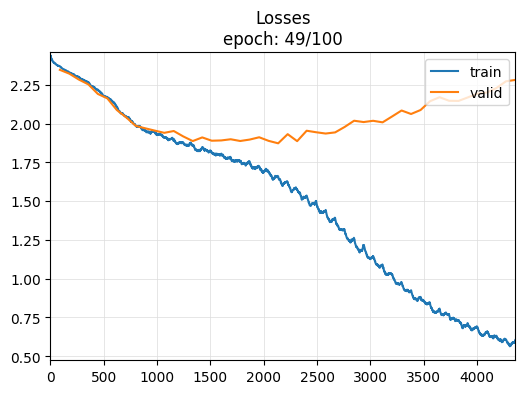

Better model found at epoch 1 with accuracy value: 0.18854749202728271.
Better model found at epoch 2 with accuracy value: 0.22067038714885712.
Better model found at epoch 3 with accuracy value: 0.2590782046318054.
Better model found at epoch 4 with accuracy value: 0.2758379876613617.
Better model found at epoch 5 with accuracy value: 0.28002792596817017.
Better model found at epoch 6 with accuracy value: 0.32541900873184204.
Better model found at epoch 7 with accuracy value: 0.3358938694000244.
Better model found at epoch 8 with accuracy value: 0.3498603403568268.
Better model found at epoch 9 with accuracy value: 0.35474860668182373.
Better model found at epoch 10 with accuracy value: 0.35754188895225525.
Better model found at epoch 11 with accuracy value: 0.3631284832954407.
Better model found at epoch 13 with accuracy value: 0.37290501594543457.
Better model found at epoch 14 with accuracy value: 0.3812849223613739.


KeyboardInterrupt: 

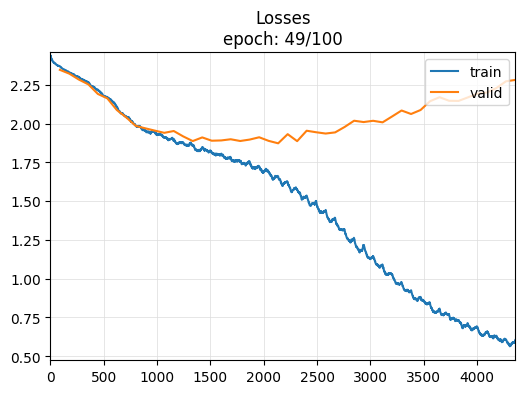

In [1049]:
from tsai.callback import *
dataset_idx = 4
tfms = [None, TSClassification()]
# batch_tfms = TSStandardize(by_sample=True)
mv_clf = TSClassifier(X, y, splits=splits, path='models', arch="XceptionTime",
                      tfms=tfms, metrics=accuracy, cbs=ShowGraph())

# weights_per_sample = prepare_LDS_weights(labels, n_bins, label_range=label_range, reweight=reweight,


mv_clf.fit_one_cycle(100, 0.001, cbs=SaveModelCallback(
    monitor='accuracy', fname="ITP_"+str(dataset_idx)))
mv_clf.export("mv_clf.pkl")

# learn = load_learner("./models/ITP_4")


# learn.fit_one_cycle(20, 0.001, cbs=SaveModelCallback(
    # monitor='valid_loss', fname="ITP_"+str(dataset_idx)))


# TSTPlus 0.38
# LSTM_FCNPlus 0.37
# TSSequencerPlus 0.38
# InceptionTimePlus 0.37


In [1050]:
learn = load_learner("./models/mv_clf.pkl")


In [1045]:
preds


array(['1', '2', '4', ..., '6', '9', '6'], dtype='<U2')

In [1057]:
y_test = y[splits[1]].astype(
    int)
probas, _, preds = learn.get_X_preds(X[splits[1]])
skm.accuracy_score(y_test, preds.astype(int))

cm = confusion_matrix(y_test, preds.astype(int))  # , labels=clf.classes_)
# skm.ConfusionMatrixDisplay(y[splits[1]].astype(
    # int), preds.astype(int))
cm

array([[ 27,  13,   0,   4,  32,   4,  10,   5,   2,   6,   1],
       [  5, 153,   7,   4,   8,   7,  14,  22,  22,   6,   4],
       [  0,  14,  13,   0,   3,   2,  15,  31,   8,   3,   4],
       [  0,  37,   0,   5,   4,   0,   3,   3,  13,   1,   2],
       [ 17,  19,   1,   1, 136,   3,  33,   7,   2,   6,  12],
       [  5,  20,   1,   0,  22,  11,  15,   3,   6,   2,   5],
       [  7,  19,   5,   4,  40,   5,  48,   7,  15,  16,   7],
       [  1,  10,   4,   1,   3,   1,  11, 102,   5,   2,   5],
       [  3,  46,   3,   5,   8,   1,   7,  13,  20,   1,   2],
       [  7,   2,   1,   0,   5,   0,   8,   2,   3,  23,   1],
       [  5,  23,   5,   0,  18,   2,  20,  14,   3,   4,  15]])

In [1055]:
probas


tensor([[0.0639, 0.3264, 0.0646,  ..., 0.0573, 0.0660, 0.0579],
        [0.0563, 0.0582, 0.1040,  ..., 0.1100, 0.0747, 0.0759],
        [0.2490, 0.0251, 0.0262,  ..., 0.0251, 0.0251, 0.0251],
        ...,
        [0.0620, 0.0684, 0.0626,  ..., 0.1090, 0.0729, 0.1126],
        [0.0133, 0.0081, 0.0081,  ..., 0.0082, 0.0109, 0.8749],
        [0.0518, 0.0572, 0.0518,  ..., 0.0706, 0.0977, 0.1581]])

array([ 8, 10, 10, ...,  8,  1,  1])

In [1014]:
# dsid = 'NATOPS'
bs = 64
# X, y, splits = get_UCR_data(dsid, return_split=False)
print(X.shape)
tfms = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[bs, bs*2])

# TSTPlus 0.38
# LSTM_FCNPlus 0.37
# TSSequencerPlus 0.38
# InceptionTimePlus 0.37
archs = [(XceptionTime, {})]

# results = pd.DataFrame(columns=[
                    #    'arch', 'hyperparams', 'total params', 'train loss', 'valid loss', 'accuracy', 'time','epoch'])
for i, (arch, k) in enumerate(archs):
    model = create_model(arch, dls=dls, **k)
    print(model.__class__.__name__)
    learn = Learner(dls, model,  metrics=accuracy)
    start = time.time()
    learn.fit_one_cycle(50, 1e-3)
    elapsed = time.time() - start
    a_list = [learn.recorder.values[i][2]
              for i in range(len(learn.recorder.values))]
    max_index = a_list.index(max(a_list))
    vals = learn.recorder.values[max_index]
    results.loc[12+i] = [arch.__name__, k, count_parameters(
        model), vals[0], vals[1], vals[2], int(elapsed), max_index]
    results.sort_values(by='accuracy', ascending=False,
                        kind='stable', ignore_index=True, inplace=True)
    clear_output()
    display(results)


,arch,hyperparams,total params,train loss,valid loss,accuracy,time,epoch
0,TSTPlus,{},418059,1.741799,1.817480,0.379190,201,5
1,LSTM_FCNPlus,{},315271,1.828367,1.859055,0.371508,73,6
2,InceptionTimePlus,{},456843,1.637768,1.960219,0.363128,189,5


In [1013]:
results


,arch,hyperparams,total params,train loss,valid loss,accuracy,time,epoch
0,TSTPlus,{},418059,1.741799,1.817480,0.379190,201,5
1,LSTM_FCNPlus,{},315271,1.828367,1.859055,0.371508,73,6


In [1010]:
results


,arch,hyperparams,total params,train loss,valid loss,accuracy,time,epoch
0,XceptionTime,{},400870,1.736436,1.845543,0.387570,250,15
1,LSTM_FCN,{},315271,1.587158,1.856894,0.377793,71,12
2,InceptionTime,{},456843,1.705602,1.856139,0.377095,178,4
3,LSTM_FCN,{'shuffle': False},311671,1.744354,1.872490,0.363128,109,8
4,LSTM,"{'n_layers': 2, 'bidirectional': True}",328611,1.722459,1.918031,0.362430,262,34
5,LSTM,"{'n_layers': 3, 'bidirectional': False}",205111,1.722573,1.928155,0.360335,196,33
6,ResCNN,{},258956,1.770813,1.892198,0.358939,66,5
7,LSTM,"{'n_layers': 2, 'bidirectional': False}",124311,1.756449,1.919267,0.355447,133,34
8,LSTM,"{'n_layers': 3, 'bidirectional': True}",570211,1.604632,1.965706,0.354050,396,35
9,LSTM,"{'n_layers': 1, 'bidirectional': False}",43511,1.812404,1.921670,0.351955,68,34


In [1008]:
arch	hyperparams	total params	train loss	valid loss	accuracy	time	epoch
0	XceptionTime	{}	400870	1.736436	1.845543	0.387570	250	15
1	LSTM_FCN	{}	315271	1.587158	1.856894	0.377793	71	12
2	InceptionTime	{}	456843	1.705602	1.856139	0.377095	178	4
3	LSTM_FCN	{'shuffle': False}	311671	1.744354	1.872490	0.363128	109	8
4	LSTM	{'n_layers': 2, 'bidirectional': True}	328611	1.722459	1.918031	0.362430	262	34
5	LSTM	{'n_layers': 3, 'bidirectional': False}	205111	1.722573	1.928155	0.360335	196	33
6	ResCNN	{}	258956	1.770813	1.892198	0.358939	66	5
7	LSTM	{'n_layers': 2, 'bidirectional': False}	124311	1.756449	1.919267	0.355447	133	34
8	LSTM	{'n_layers': 3, 'bidirectional': True}	570211	1.604632	1.965706	0.354050	396	35
9	LSTM	{'n_layers': 1, 'bidirectional': False}	43511	1.812404	1.921670	0.351955	68	34
10	LSTM	{'n_layers': 1, 'bidirectional': True}	87011	1.836406	1.903217	0.343575	127	32
11	OmniScaleCNN	{}	1638242	1.878945	2.004440	0.332402	202	11


(tsai.models.mWDN.mWDN, {'levels': 4})

In [1003]:
a_list= [learn.recorder.values[i][2]
          for i in range(len(learn.recorder.values))]
max_index = a_list.index(max(a_list))


In [724]:
def convert(string):
    list1 = []
    list1[:0] = string
    return [float(x) for x in list1]


0.3861731843575419
                             precision    recall  f1-score   support

                     Breast       0.35      0.26      0.30       104
                 ColoRectal       0.43      0.61      0.50       252
                     Corpus       0.33      0.14      0.20        93
Liver_Gallbladder_Bile_Duct       0.21      0.07      0.11        68
              Lung_Bronchus       0.49      0.57      0.53       237
                   Melanoma       0.31      0.12      0.17        90
              Other_Urinary       0.26      0.28      0.27       173
                      Ovary       0.49      0.70      0.58       145
                   Pancreas       0.20      0.18      0.19       109
                   Prostate       0.33      0.44      0.38        52
                Soft_Tissue       0.26      0.14      0.18       109

                   accuracy                           0.39      1432
                  macro avg       0.33      0.32      0.31      1432
             

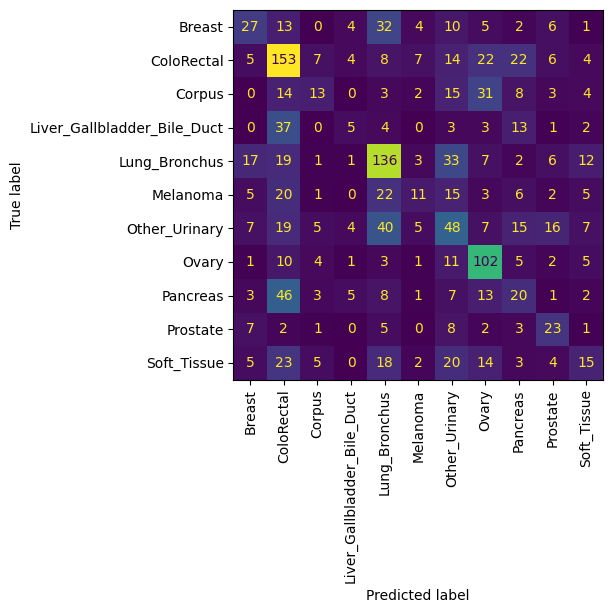

In [1068]:
y_test = y[splits[1]].astype(int)
probas, _, preds = learn.get_X_preds(X[splits[1]])
print(skm.accuracy_score(y_test, preds.astype(int)))

# top5_acc = [round(top_k_accuracy_score(y_test, preds.astype(int), k=i), 2)
            # for i in range(1, 6)]

# y_test = y.argmax(dim=1).cpu()
y_score = preds.astype(int)
print(classification_report(y_test, y_score, target_names=l))

cm = confusion_matrix(y_test, y_score)


cm_display = ConfusionMatrixDisplay(
    cm, display_labels=l).plot(xticks_rotation='vertical', colorbar=False)

# fig = cm_display.figure_
# fig.set_figwidth(13)
# fig.set_figheight(13)
# fig.suptitle('TimeInterval: {} days, Min No. of RadiologyReports: {} Top1to5 Accuracy={} \n ClassNumber: {} Cancer types Min No. of train data {} each class \n Training count: {}, Validation count:{}\n time_series_No: {}'.format(
#     input_seq_len*90, min_report_number, top5_acc, class_number, min_No_training, len(train_x), len(val_x), input_seq_len))



In [1076]:
top5_acc = [round(top_k_accuracy_score(y_test, probas, k=i), 2) for i in range(1, 6)]
top5_acc


[0.17, 0.25, 0.32, 0.42, 0.5]

In [1079]:
probas, ppp, preds = learn.get_X_preds(X[splits[1]])


In [1085]:
print(probas.cpu())


tensor([[0.0639, 0.3264, 0.0646,  ..., 0.0573, 0.0660, 0.0579],
        [0.0563, 0.0582, 0.1040,  ..., 0.1100, 0.0747, 0.0759],
        [0.2490, 0.0251, 0.0262,  ..., 0.0251, 0.0251, 0.0251],
        ...,
        [0.0620, 0.0684, 0.0626,  ..., 0.1090, 0.0729, 0.1126],
        [0.0133, 0.0081, 0.0081,  ..., 0.0082, 0.0109, 0.8749],
        [0.0518, 0.0572, 0.0518,  ..., 0.0706, 0.0977, 0.1581]])


In [1089]:
top_k_accuracy_score(y_test, probas, k=1)


0.1696927374301676

In [1088]:
min(y_test)


0